In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 200

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Ad-data.csv')
df.shape

(16834, 16)

### Descriptive Stats

In [4]:
df.head()

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0


In [5]:
df.tail()

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
16829,2020-07-07,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,25-34,19.88,36,15,0.0
16830,2020-07-07,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,35-44,1.64,11,1,0.0
16831,2020-07-07,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,45-54,0.00,3,0,0.0
16832,2020-07-07,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,65 or more,0.00,3,0,0.0
16833,2020-07-07,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,Undetermined,1.40,14,1,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16834 entries, 0 to 16833
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  16834 non-null  object 
 1   product               16834 non-null  object 
 2   phase                 16834 non-null  object 
 3   campaign_platform     16834 non-null  object 
 4   campaign_type         16834 non-null  object 
 5   communication_medium  16834 non-null  object 
 6   subchannel            16834 non-null  object 
 7   audience_type         16834 non-null  object 
 8   creative_type         16834 non-null  object 
 9   creative_name         16834 non-null  object 
 10  device                16834 non-null  object 
 11  age                   16834 non-null  object 
 12  spends                16834 non-null  float64
 13  impressions           16834 non-null  int64  
 14  clicks                16834 non-null  int64  
 15  link_clicks        

In [20]:
df.dtypes

Date                    datetime64[ns]
product                         object
phase                           object
campaign_platform               object
campaign_type                   object
communication_medium            object
subchannel                      object
audience_type                   object
creative_type                   object
creative_name                   object
device                          object
age                             object
spends                         float64
impressions                      int64
clicks                           int64
link_clicks                     object
dtype: object

In [21]:
df.isnull().sum()

Date                    0
product                 0
phase                   0
campaign_platform       0
campaign_type           0
communication_medium    0
subchannel              0
audience_type           0
creative_type           0
creative_name           0
device                  0
age                     0
spends                  0
impressions             0
clicks                  0
link_clicks             0
dtype: int64

In [9]:
# Handling missing values - using fillna()
df['link_clicks'].fillna('0',inplace=True)

In [11]:
# Handling incorrect formats - 
df['Date'] = pd.to_datetime(df['Date'])

In [18]:
df[df.duplicated()]

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks


In [19]:
df.duplicated().value_counts()

False    16629
dtype: int64

In [17]:
# Handling duplicate values
df.drop_duplicates(inplace=True)

In [23]:
## Describe

df_cat = df.select_dtypes(include=['object'])
df_cat.describe()

,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,link_clicks
count,16629,16629,16629,16629,16629,16629,16629,16629,16629,16629,16629,16629.0
unique,1,1,2,2,2,4,4,3,4,4,7,161.0
top,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,25-34,0.0
freq,16629,16629,14896,14896,14896,7791,14896,14896,14896,7322,3075,14896.0


In [24]:
df_num = df.select_dtypes(include=['int64','float64'])
df_num.describe()

,spends,impressions,clicks
count,16629.000000,16629.000000,16629.000000
mean,150.527103,291.490168,12.125383
std,486.586061,2459.264317,45.052407
min,0.000000,0.000000,0.000000
25%,0.430000,4.000000,0.000000
50%,23.640000,13.000000,2.000000
75%,112.090000,66.000000,9.000000
max,9221.960000,67454.000000,1075.000000


In [25]:
df_cat.age.value_counts()

25-34           3075
35-44           2857
Undetermined    2555
45-54           2475
18-24           2454
55-64           1703
65 or more      1510
Name: age, dtype: int64

In [26]:
df_cat.campaign_platform.unique()

array(['Google Ads', 'Facebook Ads'], dtype=object)

In [27]:
df_cat.campaign_type.nunique()

2

In [30]:
df_cat.columns

Index(['product', 'phase', 'campaign_platform', 'campaign_type',
       'communication_medium', 'subchannel', 'audience_type', 'creative_type',
       'creative_name', 'device', 'age', 'link_clicks'],
      dtype='object')

In [33]:
for cols in df_cat.columns:
    print('column:', cols)
    print(df_cat[cols].value_counts())
    print('----------------------')

column: product
Product 1    16629
Name: product, dtype: int64
----------------------
column: phase
Performance    16629
Name: phase, dtype: int64
----------------------
column: campaign_platform
Google Ads      14896
Facebook Ads     1733
Name: campaign_platform, dtype: int64
----------------------
column: campaign_type
Search         14896
Conversions     1733
Name: campaign_type, dtype: int64
----------------------
column: communication_medium
Search Keywords    14896
Creative            1733
Name: communication_medium, dtype: int64
----------------------
column: subchannel
Brand           7791
Generic         4443
Competitor      2662
Facebook Ads    1733
Name: subchannel, dtype: int64
----------------------
column: audience_type
'-            14896
Audience 1      813
Audience 2      738
Audience 3      182
Name: audience_type, dtype: int64
----------------------
column: creative_type
'-          14896
Image        1130
Carousal      603
Name: creative_type, dtype: int64
---------

In [37]:
## Feature Engineering: Date extraction

In [34]:
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month
df['Day'] = df.Date.dt.day
df['Week'] = df.Date.dt.week

In [36]:
df.head()

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks,Year,Month,Day,Week
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0,2019,10,16,42
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0,2019,10,16,42
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0,2019,10,16,42
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0,2019,10,16,42
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0,2019,10,18,42


In [38]:
df.groupby(['Year'])['spends'].mean()

Year
2019    192.574577
2020    137.730475
Name: spends, dtype: float64

In [39]:
df.groupby(['Year'])['impressions'].mean()

Year
2019    115.310309
2020    345.108322
Name: impressions, dtype: float64

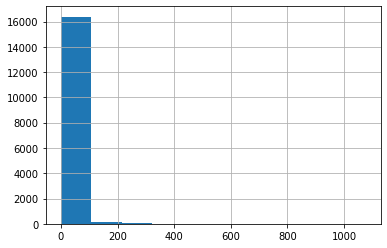

In [40]:
# univariate
df.clicks.hist()

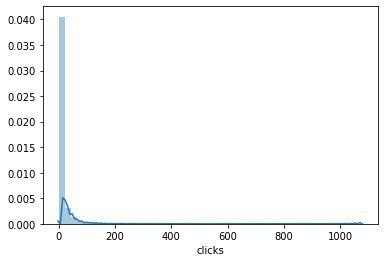

In [41]:
sns.distplot(df.clicks)

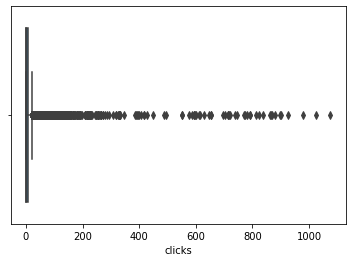

In [42]:
sns.boxplot(df['clicks'])

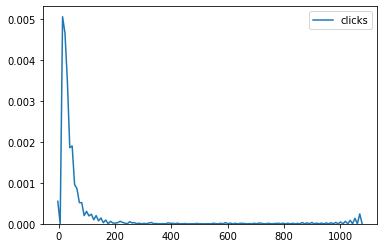

In [43]:
sns.kdeplot(df['clicks'])

In [44]:
df['clicks_log'] = np.log(1+df['clicks'])

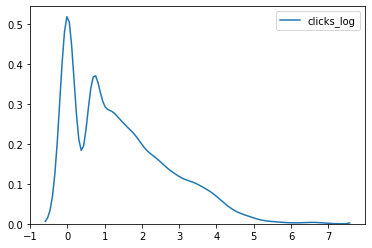

In [45]:
sns.kdeplot(df['clicks_log'])

In [46]:
df[['clicks','clicks_log']]

,clicks,clicks_log
0,0,0.000000
1,0,0.000000
2,0,0.000000
3,3,1.386294
4,2,1.098612
...,...,...
16829,15,2.772589
16830,1,0.693147
16831,0,0.000000
16832,0,0.000000


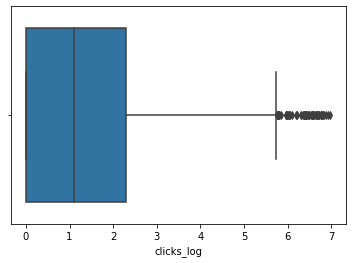

In [47]:
sns.boxplot(df['clicks_log'])

In [48]:
df['clicks_sqrt'] = np.sqrt(df['clicks'])

In [49]:
df[['clicks','clicks_log','clicks_sqrt']]

,clicks,clicks_log,clicks_sqrt
0,0,0.000000,0.000000
1,0,0.000000,0.000000
2,0,0.000000,0.000000
3,3,1.386294,1.732051
4,2,1.098612,1.414214
...,...,...,...
16829,15,2.772589,3.872983
16830,1,0.693147,1.000000
16831,0,0.000000,0.000000
16832,0,0.000000,0.000000


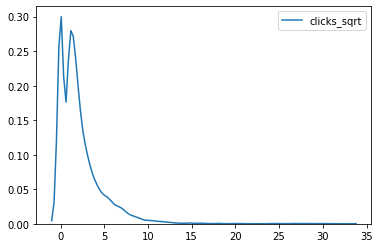

In [50]:
sns.kdeplot(df['clicks_sqrt'])

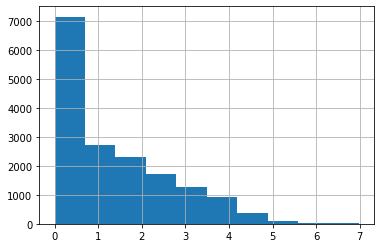

In [51]:
df['clicks_log'].hist()

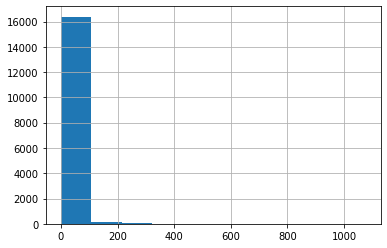

In [52]:
df['clicks'].hist()

In [63]:
df['clicks']

0         0
1         0
2         0
3         3
4         2
         ..
16829    15
16830     1
16831     0
16832     0
16833     1
Name: clicks, Length: 16629, dtype: int64

In [64]:
df['clicks_log']

0        0.000000
1        0.000000
2        0.000000
3        1.386294
4        1.098612
           ...   
16829    2.772589
16830    0.693147
16831    0.000000
16832    0.000000
16833    0.693147
Name: clicks_log, Length: 16629, dtype: float64

In [69]:
Q1 = np.quantile(df['clicks_log'],0.25)
Q3 = np.quantile(df['clicks_log'],0.75)

IQR = Q3-Q1

lower_boundary = Q1 - (1.5*IQR)
upper_boundary = Q3  + (1.5*IQR)

In [70]:
df_new = df[(df['clicks_log']>lower_boundary) & (df['clicks_log']<upper_boundary)]

In [57]:
df.shape

(16629, 22)

In [71]:
df_new.shape

(16568, 22)

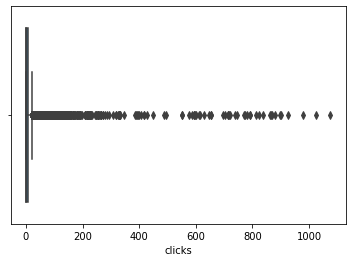

In [74]:
sns.boxplot(df['clicks'])

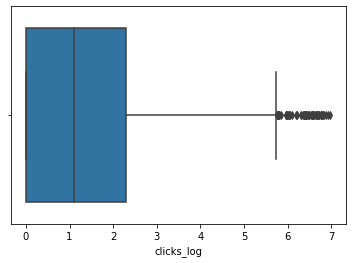

In [73]:
sns.boxplot(df['clicks_log'])

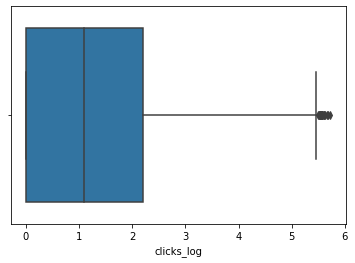

In [72]:
sns.boxplot(df_new['clicks_log'])

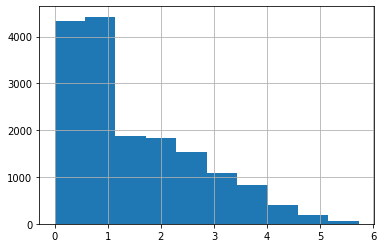

In [75]:
df_new['clicks_log'].hist()

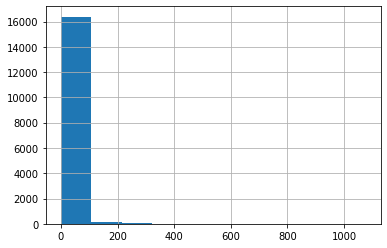

In [76]:
df['clicks'].hist()

1. Computer can only understand 1s and 0s
2. Prepare your data by scaling/normalizing it up to the nearest 0 as much as possible - minimize the value 
3. Handle the data - in terms of how you will teach your model


In [77]:
df_cat

,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,link_clicks
0,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0
1,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0
2,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0
3,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,0
4,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16829,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,25-34,0
16830,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,35-44,0
16831,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,45-54,0
16832,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,65 or more,0
